Вам доступна таблица некоторых синтетических данных, на основании которых необходимо выполнить кластеризацию на K=3 кластера методом К-средних.

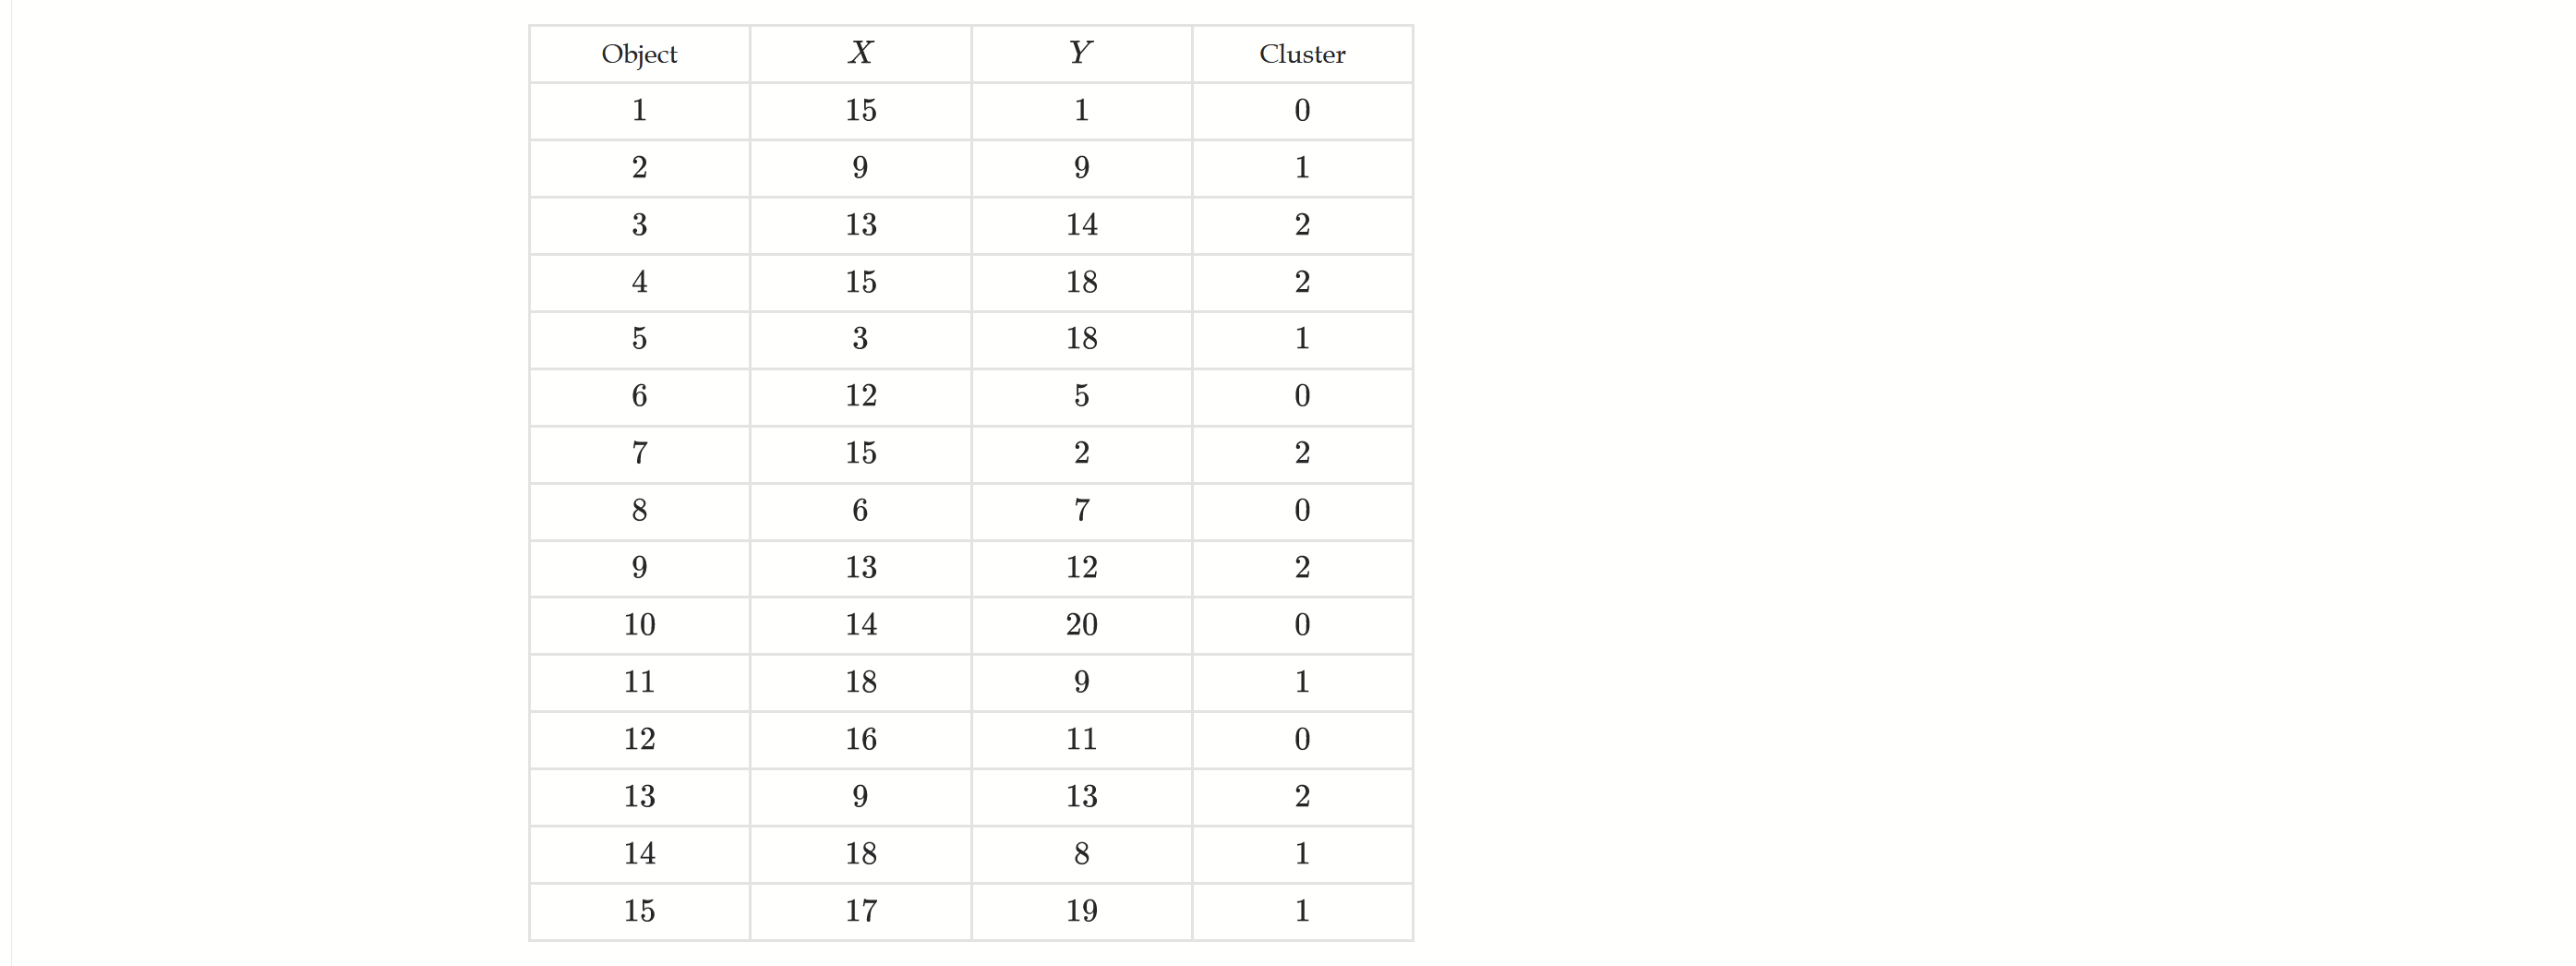

В sklearn используйте начальную инициализацию со следующими координатами центроидов и параметрами:
KMeans(n_clusters=3, init=np.array([[12.6, 8.8], [13.0, 12.6], [13.0, 11.8]]), max_iter=100, n_init=1)

- Укажите, к какому кластеру будет отнесен тот или иной объект в результате кластеризации (задание засчитывается только в том случае, если все кластеры указаны верно).
- По результатам выполнения кластеризации определить среднее расстояний между объектами и центроидом, отнесенных к кластеру 0.

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_k_mean/data_claster.csv', index_col='Object')
data = data.drop('Cluster', axis=1)
data1 = data.copy().to_numpy()

In [4]:
kmeans = KMeans(n_clusters=3, init=np.array([[12.6, 8.8], [13.0, 12.6], [13.0, 11.8]]), max_iter=100, n_init=1).fit(data1)
predicted = kmeans.predict(data1)
for i in range(len(data1)):
    print(data1[i], ' принадлежит кластеру ', predicted[i])

[15  1]  принадлежит кластеру  0
[9 9]  принадлежит кластеру  0
[13 14]  принадлежит кластеру  1
[15 18]  принадлежит кластеру  1
[ 3 18]  принадлежит кластеру  1
[12  5]  принадлежит кластеру  0
[15  2]  принадлежит кластеру  0
[6 7]  принадлежит кластеру  0
[13 12]  принадлежит кластеру  2
[14 20]  принадлежит кластеру  1
[18  9]  принадлежит кластеру  2
[16 11]  принадлежит кластеру  2
[ 9 13]  принадлежит кластеру  1
[18  8]  принадлежит кластеру  2
[17 19]  принадлежит кластеру  1


In [6]:
claster_0 = [data1[0], data1[1], data1[5], data1[6], data1[7]]
centroid_sum = [0, 0]
for i in range(len(claster_0)):
    centroid_sum += np.array(claster_0[i])
centroid = centroid_sum/len(claster_0)
print('Координаты центроида кластера 0: ', centroid)

distance = np.zeros(len(data1))
for i in range(len(data1)):
    distance[i] = np.sqrt(((data1[i])[0]-centroid[0])**2 + ((data1[i])[1]-centroid[1])**2)
    print('Расстояние до центроида кластера 0 ', centroid, 'от точки', data1[i],' = ',  distance[i])
distance_mean = sum(distance)/len(distance)
print('Среднее расстояний всех точек до центроида кластера 0', distance_mean)

data_ = data.copy()
data_['predicted'] = predicted
data2 = data_[data_.predicted == 0].copy().to_numpy()
# print(data2)
distance_cluster_0 = np.zeros(len(data2))
for i in range(len(data2)):
    distance_cluster_0[i] = np.sqrt(((data2[i])[0]-centroid[0])**2 + ((data2[i])[1]-centroid[1])**2)
print('Среднее внутрикластерное расстояние кластера 0: ', sum(distance_cluster_0)/len(data2))

Координаты центроида кластера 0:  [11.4  4.8]
Расстояние до центроида кластера 0  [11.4  4.8] от точки [15  1]  =  5.2345009313209605
Расстояние до центроида кластера 0  [11.4  4.8] от точки [9 9]  =  4.83735464897913
Расстояние до центроида кластера 0  [11.4  4.8] от точки [13 14]  =  9.338094023943
Расстояние до центроида кластера 0  [11.4  4.8] от точки [15 18]  =  13.682105101189656
Расстояние до центроида кластера 0  [11.4  4.8] от точки [ 3 18]  =  15.646085772486357
Расстояние до центроида кластера 0  [11.4  4.8] от точки [12  5]  =  0.6324555320336757
Расстояние до центроида кластера 0  [11.4  4.8] от точки [15  2]  =  4.560701700396551
Расстояние до центроида кластера 0  [11.4  4.8] от точки [6 7]  =  5.830951894845301
Расстояние до центроида кластера 0  [11.4  4.8] от точки [13 12]  =  7.37563556583431
Расстояние до центроида кластера 0  [11.4  4.8] от точки [14 20]  =  15.420765220960988
Расстояние до центроида кластера 0  [11.4  4.8] от точки [18  9]  =  7.8230428862431785
